Рассмотрим основные моменты не вошедшие в предыдущие лекции

Обновим и подключим библиотеки:

In [689]:
#!pip install --upgrade pip --user
#!pip install --upgrade scikit-learn==0.23.0

In [690]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [691]:
#!pip install keras
#!pip install tensorflow

Импортируем датасет MNIST.

In [692]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

Объем тренировочного набора данных:

In [693]:
len(X_train)

60000

Посмотрим, что из себя представляет, например, нулевой объект.

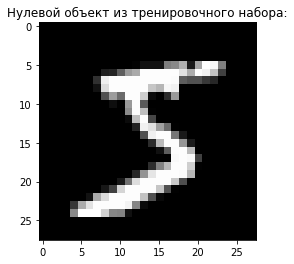

In [694]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

Отклик нулевого объекта из тренировочного набора:

In [695]:
y_train[0]

5

Для начала преобразуем данные в привычный формат.

In [696]:
#dim = 784 # 28*28
#X_train = X_train.reshape(len(X_train), dim)
#X_test = X_test.reshape(len(X_test), dim)

Уменьшим размерность тестовых данных, выбрав 44 главных компонент

In [697]:
dim = 784 # 28*28
X_train = X_train.reshape(len(X_train), dim)

In [698]:
from sklearn.decomposition import PCA

pca = PCA(n_components=44, svd_solver='full')
modelPCA = pca.fit(X_train)
print(np.cumsum(pca.explained_variance_ratio_))
X_train = modelPCA.transform(X_train)


[0.09704664 0.16800588 0.22969677 0.28359097 0.33227894 0.37540125
 0.40812055 0.4369595  0.4645798  0.4881498  0.5092417  0.52947161
 0.54662979 0.56355091 0.57933732 0.59416685 0.60741246 0.62018143
 0.63205406 0.6435809  0.65424256 0.66430969 0.67384542 0.68297086
 0.69180491 0.7001981  0.70832389 0.71618755 0.72363488 0.73054347
 0.73712441 0.74360589 0.74963204 0.75549786 0.76119807 0.76663435
 0.77169222 0.7765708  0.7813851  0.78610776 0.79067523 0.79512359
 0.7993086  0.80329076]


Для разделения данных рекомендуем использовать функцию train_test_split из библиотеки sklearn. Следующий код разделяет исходные данные в отношении 70/30.

In [699]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=45)

In [700]:
X_train[:,0].mean()

0.15659943217802416

In [701]:
X_test

array([[-1012.80178217,  -261.81848279,   -16.4700915 , ...,
          -52.37882736,   -54.88899295,  -124.48327169],
       [ 1325.97279865,  -345.28459414,   353.59999713, ...,
           74.39513039,   215.82090084,   -63.2769955 ],
       [ -764.25713488,   176.58081261,   188.09169765, ...,
           53.99866631,    -2.73099552,   -43.00048221],
       ...,
       [ -990.26083137,  -190.53377701,   -64.18283187, ...,
           46.01331513,   -17.9954776 ,   -19.6529625 ],
       [  -47.28178976,  -149.85297939,  -251.86224964, ...,
           38.72297389,    85.66458819,    86.6820952 ],
       [ -396.40716286,   455.7660625 ,  -418.51350317, ...,
          149.97943207,    -8.28482258,    13.58116371]])

Подключаем библиотеку для обучения многоклассового классификатора методом One-vs-All и дерево принятия решений

In [702]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Обучаем модель:

In [703]:
#lr = LogisticRegression(solver='lbfgs', random_state=45)
#clf = OneVsRestClassifier(lr).fit(X_train, y_train)

In [704]:
tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=45)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

In [705]:
#dt = DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, random_state=45)
#clf = OneVsRestClassifier(dt).fit(X_train, y_train)

Примените полученное ранее преобразование метода главных компонент к тестовым данным

In [706]:
#X_test = modelPCA.transform(X_test)

In [707]:
y_pred = clf.predict(X_test)

Выполняем оценку:

In [708]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

In [709]:
CM

array([[1721,    0,    6,    5,    3,   15,   16,    1,    4,    4],
       [   1, 1926,   18,    4,    1,    5,    4,    5,    8,    2],
       [  12,    5, 1648,   25,   18,    7,   10,   15,   41,    7],
       [   5,    6,   42, 1623,    5,   60,    7,   20,   46,   18],
       [   6,   13,   15,    3, 1568,    5,   22,   11,   12,   75],
       [  21,    4,   18,   50,   24, 1401,   38,    4,   28,   13],
       [  18,    5,   11,    3,    7,   29, 1673,    1,    9,    1],
       [  11,   17,   27,    0,   26,    5,    0, 1767,    9,   45],
       [  12,   23,   31,   70,   19,   46,   10,    5, 1584,   26],
       [  12,    6,    6,   34,   74,    6,    3,   50,   15, 1604]],
      dtype=int64)

Число верно классифицирвоанных объектов класс 0

In [710]:
CM[0][0]

1721

Число объектов класс 0 отнесенных к классу 8

In [711]:
CM[8][8]

1584

In [712]:
CM[5][5]

1401

In [713]:
import pandas as pd
scores = pd.read_csv('pred_for_task.csv', delimiter=',')

In [714]:
file5 = np.array(scores.loc[scores['FileName'] == 'file5'][scores.columns[2:]])
file5 = modelPCA.transform(file5)
clf.predict_proba(file5)

array([[9.53049506e-05, 0.00000000e+00, 1.17421361e-03, 3.27616315e-04,
        6.43341515e-01, 2.33333020e-02, 5.29014134e-03, 1.24270229e-01,
        3.68329627e-02, 1.65334715e-01]])

In [715]:
file10 = np.array(scores.loc[scores['FileName'] == 'file10'][scores.columns[2:]])
file10 = modelPCA.transform(file10)
clf.predict_proba(file10)

array([[6.88163258e-05, 0.00000000e+00, 2.67684043e-04, 0.00000000e+00,
        8.73471860e-02, 6.06577681e-03, 8.39876789e-03, 1.41579230e-01,
        1.81973304e-02, 7.38075208e-01]])

In [716]:
file1 = np.array(scores.loc[scores['FileName'] == 'file1'][scores.columns[2:]])
file1 = modelPCA.transform(file1)
clf.predict_proba(file1)

array([[5.88671274e-05, 0.00000000e+00, 6.23268944e-02, 2.53014741e-04,
        0.00000000e+00, 1.36473324e-04, 4.77881800e-05, 9.05265779e-01,
        7.78321537e-03, 2.41279676e-02]])